# Separate SWR from wake versus sleep time

We ask whether L1 activity around SWR is different in wake and sleep stages

In [66]:
import quantities as pq
import numpy as np
import neo
from pathlib import Path
import xarray as xr
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, Cursor
%matplotlib widget
import scipy

from ephyviewer import mkQApp, MainViewer, TraceViewer

from minian.utilities import (
    TaskAnnotation,
    get_optimal_chk,
    load_videos,
    open_minian,
    save_minian,
)



In [67]:
folder_base = Path('/Users/ahay/Documents/DATA/L1imaging/Gaelle/Baseline_recording/RedLinesOK/session1/')

folder_Ephys = folder_base / f'OpenEphys/'
folder_Minis = folder_base / f'V4_Miniscope/minian/'

filenameE = folder_Ephys / f'SWRproperties.csv'
SWRprop = pd.read_csv(filenameE)
filenameW0 = folder_Ephys / f'LFPwake0.npy'
Wake = np.load(filenameW0, mmap_mode= 'r')
Wake0 = Wake[:,1]
filenameB = folder_base / f'SynchroFile.xlsx'
stamps = pd.read_excel(filenameB)
filenameU = folder_Minis / f'UniTtoKeep.xlsx'
UnitToKeep = pd.read_excel(filenameU)
UnitToKeepL = UnitToKeep[0].to_list()
minian_ds = open_minian(folder_Minis)


for file_path in folder_base.glob('**/*timeStamps.csv'):
    subfolder = file_path.parents[0].stem
    if subfolder == 'V4_Miniscope':
        stamps_miniscope = pd.read_csv(file_path)

Acq_freq = (list(stamps[0])[2])

TodropFile = folder_Minis / f'TodropFile.json'
with open(TodropFile, 'r') as f:
    unit_to_drop = json.load(f)
TodropFile = folder_Minis / f'AllunitsFile.json'
with open(TodropFile, 'r') as f:
    All_units = json.load(f)

UnitToKeepLsel = []
UnitToKeepInd = [e for e, elem in enumerate(All_units) if elem in UnitToKeepL]
UnitToKeepElem = [elem for e, elem in enumerate(All_units) if elem in UnitToKeepL]
print(UnitToKeepElem)

[7, 8, 13, 15, 19, 20, 26, 33, 47, 61, 62, 63]


Force to recreate a boolean because of compatibility issues between versions of pandas (original boolean created with version of Pandas newer than the one required to run Minian)

In [68]:
Bool = Wake0.copy()
for i in range(len(Wake0)-1):
    if (Wake0[i]==0 and Wake0[i + 1]==0):
        Bool[i] = 0
    else:
        Bool[i] = 1

In [69]:
SWRprop[["peak time", "start time", "end time"]] = SWRprop[["peak time", "start time", "end time"]]-(list(stamps[0])[0]*1000)
C = minian_ds['S']
A = minian_ds['A']
B = A['unit_id']

copyB = list(B.copy())
for i in range(len(unit_to_drop)):
    elem = unit_to_drop[i]
    copyB.remove(elem)
unit_to_keep = copyB

C = C.loc[unit_to_keep,:]
nb_unit = C.shape[0]
rec_dur = C.shape[1]

In [70]:
counterAwakeSWR = 0
counterSleepSWR = 0

ScoringVectorLength = len(Bool)
WakeStatus = np.zeros((ScoringVectorLength))
WakeStatus = Bool

SWRawake = list()
SWRsleep = list()

serSWR = pd.Series(SWRprop["peak time"]).to_list()
nb_SWR = SWRprop.shape[0]
for Pswr in range(nb_SWR):
    time = round(serSWR[Pswr])
    if (WakeStatus[time] == 1): # SWR in sleep
        counterSleepSWR = counterSleepSWR + 1
        SWRsleep.append(Pswr)
    else:
        SWRawake.append(Pswr)
        counterAwakeSWR = counterAwakeSWR + 1

print(counterSleepSWR, counterAwakeSWR, nb_SWR)


438 59 497


In [71]:
from bisect import bisect_left

def take_closest(myList, myNumber):
    """
    Assumes myList is sorted. Returns closest value to myNumber.

    If two numbers are equally close, return the smallest number.
    """
    pos = bisect_left(myList, myNumber)
    if pos == 0:
        return myList[0]
    if pos == len(myList):
        return myList[-1]
    before = myList[pos - 1]
    after = myList[pos]
    if after - myNumber < myNumber - before:
        return after
    else:
        return before


def take_closest3(myList, myNumber):
    """
    Assumes myList is sorted. Returns closest value to myNumber.

    If two numbers are equally close, return the smallest number.
    """
    pos = bisect_left(myList, myNumber)
    if pos == 0:
        return myList[0]
    if pos == len(myList):
        return myList[-1]
    before = myList[pos - 1]
    after = myList[pos]
    if after - myNumber < myNumber - before:
        dummy = myList.index(after)
        return dummy
    else:
        dummy = myList.index(before)
        return dummy


pre, unit =  0 SWR =  0
pre, unit =  0 SWR =  1
pre, unit =  0 SWR =  2
pre, unit =  0 SWR =  3
pre, unit =  0 SWR =  4
pre, unit =  0 SWR =  5
pre, unit =  0 SWR =  6
pre, unit =  0 SWR =  7
pre, unit =  0 SWR =  8
pre, unit =  0 SWR =  9
pre, unit =  0 SWR =  10
pre, unit =  0 SWR =  11
pre, unit =  0 SWR =  12
pre, unit =  0 SWR =  13
pre, unit =  0 SWR =  14
pre, unit =  0 SWR =  15
pre, unit =  0 SWR =  16
pre, unit =  0 SWR =  17
pre, unit =  0 SWR =  18
pre, unit =  0 SWR =  19
pre, unit =  0 SWR =  20
pre, unit =  0 SWR =  21
pre, unit =  0 SWR =  22
pre, unit =  0 SWR =  23
pre, unit =  0 SWR =  24
pre, unit =  0 SWR =  29
pre, unit =  0 SWR =  30
pre, unit =  0 SWR =  31
pre, unit =  0 SWR =  32
pre, unit =  0 SWR =  33
pre, unit =  0 SWR =  34
pre, unit =  0 SWR =  35
pre, unit =  0 SWR =  36
pre, unit =  0 SWR =  37
pre, unit =  0 SWR =  38
pre, unit =  0 SWR =  39
pre, unit =  0 SWR =  40
pre, unit =  0 SWR =  41
pre, unit =  0 SWR =  42
pre, unit =  0 SWR =  43
pre, unit 

/var/folders/jq/nz6nvbd54ns2lkjvj31_7_4r0000gn/T/ipykernel_11585/1272259763.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Activity_Per_Neurons['SleepAll'][unit] = sum(AVGlocActivityCa_SleepSWR[0:2*Half])
/var/folders/jq/nz6nvbd54ns2lkjvj31_7_4r0000gn/T/ipykernel_11585/1272259763.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Activity_Per_Neurons['SleepBefore'][unit] = sum(AVGlocActivityCa_SleepSWR[0:Half])
/var/folders/jq/nz6nvbd54ns2lkjvj31_7_4r0000gn/T/ipykernel_11585/1272259763.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

pre, unit =  1 SWR =  0
pre, unit =  1 SWR =  1
pre, unit =  1 SWR =  2
pre, unit =  1 SWR =  3
pre, unit =  1 SWR =  4
pre, unit =  1 SWR =  5
pre, unit =  1 SWR =  6
pre, unit =  1 SWR =  7
pre, unit =  1 SWR =  8
pre, unit =  1 SWR =  9
pre, unit =  1 SWR =  10
pre, unit =  1 SWR =  11
pre, unit =  1 SWR =  12
pre, unit =  1 SWR =  13
pre, unit =  1 SWR =  14
pre, unit =  1 SWR =  15
pre, unit =  1 SWR =  16
pre, unit =  1 SWR =  17
pre, unit =  1 SWR =  18
pre, unit =  1 SWR =  19
pre, unit =  1 SWR =  20
pre, unit =  1 SWR =  21
pre, unit =  1 SWR =  22
pre, unit =  1 SWR =  23
pre, unit =  1 SWR =  24
pre, unit =  1 SWR =  29
pre, unit =  1 SWR =  30
pre, unit =  1 SWR =  31
pre, unit =  1 SWR =  32
pre, unit =  1 SWR =  33
pre, unit =  1 SWR =  34
pre, unit =  1 SWR =  35
pre, unit =  1 SWR =  36
pre, unit =  1 SWR =  37
pre, unit =  1 SWR =  38
pre, unit =  1 SWR =  39
pre, unit =  1 SWR =  40
pre, unit =  1 SWR =  41
pre, unit =  1 SWR =  42
pre, unit =  1 SWR =  43
pre, unit 

/var/folders/jq/nz6nvbd54ns2lkjvj31_7_4r0000gn/T/ipykernel_11585/1272259763.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Activity_Per_Neurons['SleepAll'][unit] = sum(AVGlocActivityCa_SleepSWR[0:2*Half])
/var/folders/jq/nz6nvbd54ns2lkjvj31_7_4r0000gn/T/ipykernel_11585/1272259763.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Activity_Per_Neurons['SleepBefore'][unit] = sum(AVGlocActivityCa_SleepSWR[0:Half])
/var/folders/jq/nz6nvbd54ns2lkjvj31_7_4r0000gn/T/ipykernel_11585/1272259763.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

pre, unit =  3 SWR =  0
pre, unit =  3 SWR =  1
pre, unit =  3 SWR =  2
pre, unit =  3 SWR =  3
pre, unit =  3 SWR =  4
pre, unit =  3 SWR =  5
pre, unit =  3 SWR =  6
pre, unit =  3 SWR =  7
pre, unit =  3 SWR =  8
pre, unit =  3 SWR =  9
pre, unit =  3 SWR =  10
pre, unit =  3 SWR =  11
pre, unit =  3 SWR =  12
pre, unit =  3 SWR =  13
pre, unit =  3 SWR =  14
pre, unit =  3 SWR =  15
pre, unit =  3 SWR =  16
pre, unit =  3 SWR =  17
pre, unit =  3 SWR =  18
pre, unit =  3 SWR =  19
pre, unit =  3 SWR =  20
pre, unit =  3 SWR =  21
pre, unit =  3 SWR =  22
pre, unit =  3 SWR =  23
pre, unit =  3 SWR =  24
pre, unit =  3 SWR =  29
pre, unit =  3 SWR =  30
pre, unit =  3 SWR =  31
pre, unit =  3 SWR =  32
pre, unit =  3 SWR =  33
pre, unit =  3 SWR =  34
pre, unit =  3 SWR =  35
pre, unit =  3 SWR =  36
pre, unit =  3 SWR =  37
pre, unit =  3 SWR =  38
pre, unit =  3 SWR =  39
pre, unit =  3 SWR =  40
pre, unit =  3 SWR =  41
pre, unit =  3 SWR =  42
pre, unit =  3 SWR =  43
pre, unit 

/var/folders/jq/nz6nvbd54ns2lkjvj31_7_4r0000gn/T/ipykernel_11585/1272259763.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Activity_Per_Neurons['SleepAll'][unit] = sum(AVGlocActivityCa_SleepSWR[0:2*Half])
/var/folders/jq/nz6nvbd54ns2lkjvj31_7_4r0000gn/T/ipykernel_11585/1272259763.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Activity_Per_Neurons['SleepBefore'][unit] = sum(AVGlocActivityCa_SleepSWR[0:Half])
/var/folders/jq/nz6nvbd54ns2lkjvj31_7_4r0000gn/T/ipykernel_11585/1272259763.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

pre, unit =  5 SWR =  0
pre, unit =  5 SWR =  1
pre, unit =  5 SWR =  2
pre, unit =  5 SWR =  3
pre, unit =  5 SWR =  4
pre, unit =  5 SWR =  5
pre, unit =  5 SWR =  6
pre, unit =  5 SWR =  7
pre, unit =  5 SWR =  8
pre, unit =  5 SWR =  9
pre, unit =  5 SWR =  10
pre, unit =  5 SWR =  11
pre, unit =  5 SWR =  12
pre, unit =  5 SWR =  13
pre, unit =  5 SWR =  14
pre, unit =  5 SWR =  15
pre, unit =  5 SWR =  16
pre, unit =  5 SWR =  17
pre, unit =  5 SWR =  18
pre, unit =  5 SWR =  19
pre, unit =  5 SWR =  20
pre, unit =  5 SWR =  21
pre, unit =  5 SWR =  22
pre, unit =  5 SWR =  23
pre, unit =  5 SWR =  24
pre, unit =  5 SWR =  29
pre, unit =  5 SWR =  30
pre, unit =  5 SWR =  31
pre, unit =  5 SWR =  32
pre, unit =  5 SWR =  33
pre, unit =  5 SWR =  34
pre, unit =  5 SWR =  35
pre, unit =  5 SWR =  36
pre, unit =  5 SWR =  37
pre, unit =  5 SWR =  38
pre, unit =  5 SWR =  39
pre, unit =  5 SWR =  40
pre, unit =  5 SWR =  41
pre, unit =  5 SWR =  42
pre, unit =  5 SWR =  43
pre, unit 

/var/folders/jq/nz6nvbd54ns2lkjvj31_7_4r0000gn/T/ipykernel_11585/1272259763.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Activity_Per_Neurons['SleepAll'][unit] = sum(AVGlocActivityCa_SleepSWR[0:2*Half])
/var/folders/jq/nz6nvbd54ns2lkjvj31_7_4r0000gn/T/ipykernel_11585/1272259763.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Activity_Per_Neurons['SleepBefore'][unit] = sum(AVGlocActivityCa_SleepSWR[0:Half])
/var/folders/jq/nz6nvbd54ns2lkjvj31_7_4r0000gn/T/ipykernel_11585/1272259763.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

pre, unit =  6 SWR =  0
pre, unit =  6 SWR =  1
pre, unit =  6 SWR =  2
pre, unit =  6 SWR =  3
pre, unit =  6 SWR =  4
pre, unit =  6 SWR =  5
pre, unit =  6 SWR =  6
pre, unit =  6 SWR =  7
pre, unit =  6 SWR =  8
pre, unit =  6 SWR =  9
pre, unit =  6 SWR =  10
pre, unit =  6 SWR =  11
pre, unit =  6 SWR =  12
pre, unit =  6 SWR =  13
pre, unit =  6 SWR =  14
pre, unit =  6 SWR =  15
pre, unit =  6 SWR =  16
pre, unit =  6 SWR =  17
pre, unit =  6 SWR =  18
pre, unit =  6 SWR =  19
pre, unit =  6 SWR =  20
pre, unit =  6 SWR =  21
pre, unit =  6 SWR =  22
pre, unit =  6 SWR =  23
pre, unit =  6 SWR =  24
pre, unit =  6 SWR =  29
pre, unit =  6 SWR =  30
pre, unit =  6 SWR =  31
pre, unit =  6 SWR =  32
pre, unit =  6 SWR =  33
pre, unit =  6 SWR =  34
pre, unit =  6 SWR =  35
pre, unit =  6 SWR =  36
pre, unit =  6 SWR =  37
pre, unit =  6 SWR =  38
pre, unit =  6 SWR =  39
pre, unit =  6 SWR =  40
pre, unit =  6 SWR =  41
pre, unit =  6 SWR =  42
pre, unit =  6 SWR =  43
pre, unit 

/var/folders/jq/nz6nvbd54ns2lkjvj31_7_4r0000gn/T/ipykernel_11585/1272259763.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Activity_Per_Neurons['SleepAll'][unit] = sum(AVGlocActivityCa_SleepSWR[0:2*Half])
/var/folders/jq/nz6nvbd54ns2lkjvj31_7_4r0000gn/T/ipykernel_11585/1272259763.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Activity_Per_Neurons['SleepBefore'][unit] = sum(AVGlocActivityCa_SleepSWR[0:Half])
/var/folders/jq/nz6nvbd54ns2lkjvj31_7_4r0000gn/T/ipykernel_11585/1272259763.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

pre, unit =  7 SWR =  0
pre, unit =  7 SWR =  1
pre, unit =  7 SWR =  2
pre, unit =  7 SWR =  3
pre, unit =  7 SWR =  4
pre, unit =  7 SWR =  5
pre, unit =  7 SWR =  6
pre, unit =  7 SWR =  7
pre, unit =  7 SWR =  8
pre, unit =  7 SWR =  9
pre, unit =  7 SWR =  10
pre, unit =  7 SWR =  11
pre, unit =  7 SWR =  12
pre, unit =  7 SWR =  13
pre, unit =  7 SWR =  14
pre, unit =  7 SWR =  15
pre, unit =  7 SWR =  16
pre, unit =  7 SWR =  17
pre, unit =  7 SWR =  18
pre, unit =  7 SWR =  19
pre, unit =  7 SWR =  20
pre, unit =  7 SWR =  21
pre, unit =  7 SWR =  22
pre, unit =  7 SWR =  23
pre, unit =  7 SWR =  24
pre, unit =  7 SWR =  29
pre, unit =  7 SWR =  30
pre, unit =  7 SWR =  31
pre, unit =  7 SWR =  32
pre, unit =  7 SWR =  33
pre, unit =  7 SWR =  34
pre, unit =  7 SWR =  35
pre, unit =  7 SWR =  36
pre, unit =  7 SWR =  37
pre, unit =  7 SWR =  38
pre, unit =  7 SWR =  39
pre, unit =  7 SWR =  40
pre, unit =  7 SWR =  41
pre, unit =  7 SWR =  42
pre, unit =  7 SWR =  43
pre, unit 

/var/folders/jq/nz6nvbd54ns2lkjvj31_7_4r0000gn/T/ipykernel_11585/1272259763.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Activity_Per_Neurons['SleepAll'][unit] = sum(AVGlocActivityCa_SleepSWR[0:2*Half])
/var/folders/jq/nz6nvbd54ns2lkjvj31_7_4r0000gn/T/ipykernel_11585/1272259763.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Activity_Per_Neurons['SleepBefore'][unit] = sum(AVGlocActivityCa_SleepSWR[0:Half])
/var/folders/jq/nz6nvbd54ns2lkjvj31_7_4r0000gn/T/ipykernel_11585/1272259763.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

pre, unit =  8 SWR =  0
pre, unit =  8 SWR =  1
pre, unit =  8 SWR =  2
pre, unit =  8 SWR =  3
pre, unit =  8 SWR =  4
pre, unit =  8 SWR =  5
pre, unit =  8 SWR =  6
pre, unit =  8 SWR =  7
pre, unit =  8 SWR =  8
pre, unit =  8 SWR =  9
pre, unit =  8 SWR =  10
pre, unit =  8 SWR =  11
pre, unit =  8 SWR =  12
pre, unit =  8 SWR =  13
pre, unit =  8 SWR =  14
pre, unit =  8 SWR =  15
pre, unit =  8 SWR =  16
pre, unit =  8 SWR =  17
pre, unit =  8 SWR =  18
pre, unit =  8 SWR =  19
pre, unit =  8 SWR =  20
pre, unit =  8 SWR =  21
pre, unit =  8 SWR =  22
pre, unit =  8 SWR =  23
pre, unit =  8 SWR =  24
pre, unit =  8 SWR =  29
pre, unit =  8 SWR =  30
pre, unit =  8 SWR =  31
pre, unit =  8 SWR =  32
pre, unit =  8 SWR =  33
pre, unit =  8 SWR =  34
pre, unit =  8 SWR =  35
pre, unit =  8 SWR =  36
pre, unit =  8 SWR =  37
pre, unit =  8 SWR =  38
pre, unit =  8 SWR =  39
pre, unit =  8 SWR =  40
pre, unit =  8 SWR =  41
pre, unit =  8 SWR =  42
pre, unit =  8 SWR =  43
pre, unit 

/var/folders/jq/nz6nvbd54ns2lkjvj31_7_4r0000gn/T/ipykernel_11585/1272259763.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Activity_Per_Neurons['SleepAll'][unit] = sum(AVGlocActivityCa_SleepSWR[0:2*Half])
/var/folders/jq/nz6nvbd54ns2lkjvj31_7_4r0000gn/T/ipykernel_11585/1272259763.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Activity_Per_Neurons['SleepBefore'][unit] = sum(AVGlocActivityCa_SleepSWR[0:Half])
/var/folders/jq/nz6nvbd54ns2lkjvj31_7_4r0000gn/T/ipykernel_11585/1272259763.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

pre, unit =  9 SWR =  0
pre, unit =  9 SWR =  1
pre, unit =  9 SWR =  2
pre, unit =  9 SWR =  3
pre, unit =  9 SWR =  4
pre, unit =  9 SWR =  5
pre, unit =  9 SWR =  6
pre, unit =  9 SWR =  7
pre, unit =  9 SWR =  8
pre, unit =  9 SWR =  9
pre, unit =  9 SWR =  10
pre, unit =  9 SWR =  11
pre, unit =  9 SWR =  12
pre, unit =  9 SWR =  13
pre, unit =  9 SWR =  14
pre, unit =  9 SWR =  15
pre, unit =  9 SWR =  16
pre, unit =  9 SWR =  17
pre, unit =  9 SWR =  18
pre, unit =  9 SWR =  19
pre, unit =  9 SWR =  20
pre, unit =  9 SWR =  21
pre, unit =  9 SWR =  22
pre, unit =  9 SWR =  23
pre, unit =  9 SWR =  24
pre, unit =  9 SWR =  29
pre, unit =  9 SWR =  30
pre, unit =  9 SWR =  31
pre, unit =  9 SWR =  32
pre, unit =  9 SWR =  33
pre, unit =  9 SWR =  34
pre, unit =  9 SWR =  35
pre, unit =  9 SWR =  36
pre, unit =  9 SWR =  37
pre, unit =  9 SWR =  38
pre, unit =  9 SWR =  39
pre, unit =  9 SWR =  40
pre, unit =  9 SWR =  41
pre, unit =  9 SWR =  42
pre, unit =  9 SWR =  43
pre, unit 

/var/folders/jq/nz6nvbd54ns2lkjvj31_7_4r0000gn/T/ipykernel_11585/1272259763.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Activity_Per_Neurons['SleepAll'][unit] = sum(AVGlocActivityCa_SleepSWR[0:2*Half])
/var/folders/jq/nz6nvbd54ns2lkjvj31_7_4r0000gn/T/ipykernel_11585/1272259763.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Activity_Per_Neurons['SleepBefore'][unit] = sum(AVGlocActivityCa_SleepSWR[0:Half])
/var/folders/jq/nz6nvbd54ns2lkjvj31_7_4r0000gn/T/ipykernel_11585/1272259763.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

pre, unit =  10 SWR =  0
pre, unit =  10 SWR =  1
pre, unit =  10 SWR =  2
pre, unit =  10 SWR =  3
pre, unit =  10 SWR =  4
pre, unit =  10 SWR =  5
pre, unit =  10 SWR =  6
pre, unit =  10 SWR =  7
pre, unit =  10 SWR =  8
pre, unit =  10 SWR =  9
pre, unit =  10 SWR =  10
pre, unit =  10 SWR =  11
pre, unit =  10 SWR =  12
pre, unit =  10 SWR =  13
pre, unit =  10 SWR =  14
pre, unit =  10 SWR =  15
pre, unit =  10 SWR =  16
pre, unit =  10 SWR =  17
pre, unit =  10 SWR =  18
pre, unit =  10 SWR =  19
pre, unit =  10 SWR =  20
pre, unit =  10 SWR =  21
pre, unit =  10 SWR =  22
pre, unit =  10 SWR =  23
pre, unit =  10 SWR =  24
pre, unit =  10 SWR =  29
pre, unit =  10 SWR =  30
pre, unit =  10 SWR =  31
pre, unit =  10 SWR =  32
pre, unit =  10 SWR =  33
pre, unit =  10 SWR =  34
pre, unit =  10 SWR =  35
pre, unit =  10 SWR =  36
pre, unit =  10 SWR =  37
pre, unit =  10 SWR =  38
pre, unit =  10 SWR =  39
pre, unit =  10 SWR =  40
pre, unit =  10 SWR =  41
pre, unit =  10 SWR = 

/var/folders/jq/nz6nvbd54ns2lkjvj31_7_4r0000gn/T/ipykernel_11585/1272259763.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Activity_Per_Neurons['SleepAll'][unit] = sum(AVGlocActivityCa_SleepSWR[0:2*Half])
/var/folders/jq/nz6nvbd54ns2lkjvj31_7_4r0000gn/T/ipykernel_11585/1272259763.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Activity_Per_Neurons['SleepBefore'][unit] = sum(AVGlocActivityCa_SleepSWR[0:Half])
/var/folders/jq/nz6nvbd54ns2lkjvj31_7_4r0000gn/T/ipykernel_11585/1272259763.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

post, unit =  0 SWR =  25
post, unit =  0 SWR =  26
post, unit =  0 SWR =  27
post, unit =  0 SWR =  28
post, unit =  1 SWR =  25
post, unit =  1 SWR =  26
post, unit =  1 SWR =  27
post, unit =  1 SWR =  28
post, unit =  2 SWR =  25
post, unit =  2 SWR =  26
post, unit =  2 SWR =  27
post, unit =  2 SWR =  28
post, unit =  3 SWR =  25
post, unit =  3 SWR =  26
post, unit =  3 SWR =  27
post, unit =  3 SWR =  28
post, unit =  4 SWR =  25
post, unit =  4 SWR =  26
post, unit =  4 SWR =  27
post, unit =  4 SWR =  28
post, unit =  5 SWR =  25
post, unit =  5 SWR =  26
post, unit =  5 SWR =  27
post, unit =  5 SWR =  28
post, unit =  6 SWR =  25
post, unit =  6 SWR =  26
post, unit =  6 SWR =  27
post, unit =  6 SWR =  28
post, unit =  7 SWR =  25
post, unit =  7 SWR =  26
post, unit =  7 SWR =  27
post, unit =  7 SWR =  28
post, unit =  8 SWR =  25
post, unit =  8 SWR =  26
post, unit =  8 SWR =  27
post, unit =  8 SWR =  28
post, unit =  9 SWR =  25
post, unit =  9 SWR =  26
post, unit =

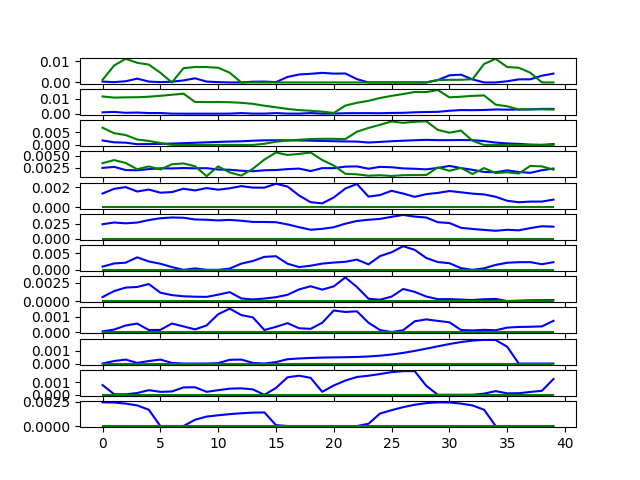

In [72]:
Cseries = C.to_series()
units = range(len(UnitToKeepInd))
maxi = len(UnitToKeepInd)
duration = 1
numbframes = int(duration*2*Acq_freq)
threshold = 0


data = {
    'SleepAll': np.zeros(maxi),
    'SleepBefore': np.zeros(maxi),
    'SleepAfter' : np.zeros(maxi),
    'WakeAll' : np.zeros(maxi),
    'WakeBefore' : np.zeros(maxi),
    'WakeAfter' : np.zeros(maxi),
    'UnitId' : np.zeros(maxi)
}
Activity_Per_Neurons = pd.DataFrame(data, columns=['SleepAll', 'SleepBefore', 'SleepAfter', 'WakeAll', 'WakeBefore', 'WakeAfter', 'UnitId'])

Activity_Per_Neurons['UnitId'] = UnitToKeepElem

ActivityCa_SWR = pd.Series(np.zeros(numbframes))
time = range(numbframes)
Half = int(ActivityCa_SWR.shape[0]/2)
TimeStamps_miniscope = list(stamps_miniscope["Time Stamp (ms)"])
plt.close()

fig, axs = plt.subplots(nrows=maxi, ncols=1)


AVGActivityCa_SleepSWR = pd.Series(np.zeros(numbframes))
nAVGActivityCa_SleepSWR = pd.Series(np.zeros(numbframes))
for unit in units:
    ActivityCa_SleepSWR = pd.Series(np.zeros(numbframes))
    AVGlocActivityCa_SleepSWR = pd.Series(np.zeros(numbframes))
    lCseries = C.isel(unit_id=unit).values
    for Pspin in SWRsleep:
        ser = pd.Series(SWRprop["start time"])
        Frame_SWR_start = take_closest(TimeStamps_miniscope, ser[Pspin])
        index = TimeStamps_miniscope.index(Frame_SWR_start)
        trace = lCseries[index-Half:index+Half]
        if len(trace)<len(time):
            print("pre, unit = ", unit, "SWR = ", Pspin)
        else:
            ActivityCa_SleepSWR = ActivityCa_SleepSWR+list(lCseries[index-Half:index+Half])# move by half for CTRL
    if max(ActivityCa_SleepSWR)>(len(SWRsleep)*threshold):
        nActivityCa_SleepSWR = ActivityCa_SleepSWR/max(ActivityCa_SleepSWR)
    elif sum(trace)>threshold:
        nActivityCa_SleepSWR = 0#ActivityCa_PFCspin
    
    AVGActivityCa_SleepSWR = AVGActivityCa_SleepSWR + ActivityCa_SleepSWR    
    AVGlocActivityCa_SleepSWR = AVGlocActivityCa_SleepSWR + ActivityCa_SleepSWR    
    nAVGActivityCa_SleepSWR = nAVGActivityCa_SleepSWR + nActivityCa_SleepSWR 
    ax = axs[unit]
    ax.plot(time, AVGlocActivityCa_SleepSWR/counterSleepSWR, color='blue') 
    Activity_Per_Neurons['SleepAll'][unit] = sum(AVGlocActivityCa_SleepSWR[0:2*Half])
    Activity_Per_Neurons['SleepBefore'][unit] = sum(AVGlocActivityCa_SleepSWR[0:Half])
    Activity_Per_Neurons['SleepAfter'][unit] = sum(AVGlocActivityCa_SleepSWR[Half:2*Half])
    
if max(AVGActivityCa_SleepSWR)>(threshold):
    nAVGActivityCa_SleepSWR = AVGActivityCa_SleepSWR/max(AVGActivityCa_SleepSWR)
else:
    nAVGActivityCa_SleepSWR = AVGActivityCa_SleepSWR


prCactBefore = sum(AVGActivityCa_SleepSWR[0:Half])
prCactAfter = sum(AVGActivityCa_SleepSWR[Half:2*Half])
nprCactBefore = sum(nAVGActivityCa_SleepSWR[0:Half])
nprCactAfter = sum(nAVGActivityCa_SleepSWR[Half:2*Half])


AVGActivityCa_WakeSWR = pd.Series(np.zeros(numbframes))
nAVGActivityCa_WakeSWR = pd.Series(np.zeros(numbframes))
for unit in units:
    AVGlocActivityCa_WakeSWR = pd.Series(np.zeros(numbframes))
    ActivityCa_WakeSWR = pd.Series(np.zeros(numbframes))
    lCseries = np.array(Cseries)[(unit)*rec_dur:(unit+1)*rec_dur]
    for Pspin in SWRawake:
        ser = pd.Series(SWRprop["start time"])
        Frame_SWR_start = take_closest(TimeStamps_miniscope, ser[Pspin])
        index = TimeStamps_miniscope.index(Frame_SWR_start)
        trace = list(lCseries[index-Half:index+Half])
        if len(trace)<len(time):
            print("post, unit = ", unit, "SWR = ", Pspin)
        else:
            ActivityCa_WakeSWR = ActivityCa_WakeSWR+list(lCseries[index-Half:index+Half])# move by half for CTRL
    if max(ActivityCa_WakeSWR)>(len(SWRawake)*threshold):
        nActivityCa_WakeSWR = ActivityCa_WakeSWR/max(ActivityCa_WakeSWR)
    elif sum(trace)>threshold:
        nActivityCa_WakeSWR = 0
    AVGActivityCa_WakeSWR = AVGActivityCa_WakeSWR + ActivityCa_WakeSWR
    AVGlocActivityCa_WakeSWR = AVGlocActivityCa_WakeSWR + ActivityCa_WakeSWR   
    nAVGActivityCa_WakeSWR = nAVGActivityCa_WakeSWR + nActivityCa_WakeSWR 
    ax = axs[unit]
    ax.plot(time, AVGlocActivityCa_WakeSWR/counterAwakeSWR, color='green') 
    Activity_Per_Neurons['WakeAll'][unit] = sum(AVGlocActivityCa_WakeSWR[0:2*Half])
    Activity_Per_Neurons['WakeBefore'][unit] = sum(AVGlocActivityCa_WakeSWR[0:Half])
    Activity_Per_Neurons['WakeAfter'][unit] = sum(AVGlocActivityCa_WakeSWR[Half:2*Half])

if max(AVGActivityCa_WakeSWR)>(threshold):
    nAVGActivityCa_WakeSWR = AVGActivityCa_WakeSWR/max(AVGActivityCa_WakeSWR)
else:
    nAVGActivityCa_WakeSWR = AVGActivityCa_WakeSWR


poCactBefore = sum(AVGActivityCa_WakeSWR[0:Half])
poCactAfter = sum(AVGActivityCa_WakeSWR[Half:2*Half])
npoCactBefore = sum(nAVGActivityCa_WakeSWR[0:Half])
npoCactAfter = sum(nAVGActivityCa_WakeSWR[Half:2*Half])

